Creating a model for the data
-----------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from sklearn import tree
from sklearn.tree import plot_tree, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import plot_tree
import graphviz

/var/folders/yw/qmvvfjd916v9cr0f447rhf700000gp/T/ipykernel_10308/1899616417.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


In [2]:
df = pd.read_csv('data/diabetes_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
# Converting relevant columns from float to int 
conv_columns = ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
df[conv_columns] = df[conv_columns].astype(int)

Splitting into features and targets
-----------------------------------

When generating a classification model we need to identify what attribute we want the model to predict, this is called the target represented here as 'y'. We also need to identify what features a model should use to predict the target value. This is what we will input into the model when we want to use it for a prediction, denoted here as 'X'

In [5]:
X = df.drop(columns=['Diabetes'])
y = df[['Diabetes']]

Test Train Split
----------------

To ensure the performace of this model I will be using a test train split. A test train split approach consists of splitting the avaiable data (features and targets) into two seperate sets. Here I am using a default value of 25%. The train dataset (usually the larger subset, in this case 75%) will be used to train the model. Once we have a model generated from the train data, it can be tested by using it to predict the outcome when given the features from the test dataset. Because we know the true outcome of this test data we can compare what the model predicted with the actual feature value and produce some performace metrics for the model, such as; accuracy, precision, recall and f1 score. Please note, here a random state variable is used to ensure that this model is repeatable.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

Generating a classification model with a decision tree algorithm
----------------------------------------------------------------

Below a decision tree model is generated using the Sklearn library decision tree classifier. The model is then fit to the training data that was produced above.

In [7]:
diabetes_dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
diabetes_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Scoring the Model

Here the model that has been produced is predicting (or classfying) the features of the test set. This is then compared with the actual test set values to produce various scores that are described below:

*   **Accuracy** - This represents the percentage of correctly classified instances of the test data when predicting the target.
*   **Precision** - This represents how well the model makes predicions for a specific instance of the target variable. The percentage of false positives when the model is tested with the test dataset.
*   **Recall** - Simillar to precision, recall show the percentage of false negatives that were predicted when the model is tested.
*   **F1 Score** - F1 represents both precision and recall (false positives and false negatives). It is a percentage calculated by 2 \* (precision \* recall) / (precision + recall).

### Train Data Scoring

Here the model is being scored with the data that was used to train it to see how well it performs at predicting values it has already seen;

In [8]:
predicted = diabetes_dt.predict(X_train)
accuracy = accuracy_score(y_train, predicted)
precision = precision_score(y_train, predicted)
recall = recall_score(y_train, predicted)
f1 = f1_score(y_train, predicted)

print("Accuracy: {} \nPrecision: {} \nRecall: {} \nF1: {}".format(accuracy,precision,recall,f1))

Accuracy: 0.9736886776438636 
Precision: 0.9912636259887451 
Recall: 0.9555041347393977 
F1: 0.9730554536148186


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


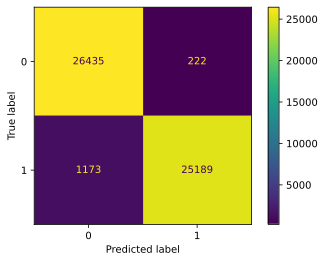

In [9]:
plot_confusion_matrix(diabetes_dt,X_train,y_train)

#### Train Data Scoring Results

The results we see here are very good across all metrics, showing that a model has been produced that is capable of predicting if a patient has diabetes when the input data has already been seen by the model.

### Test Data Scoring

Here the model will be tested with data it has not seen before

In [10]:
predicted = diabetes_dt.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

print("Accuracy: {} \nPrecision: {} \nRecall: {} \nF1: {}".format(accuracy,precision,recall,f1))

Accuracy: 0.6611214847507497 
Precision: 0.6727818160839968 
Recall: 0.6490427426536064 
F1: 0.6606991105319813


/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


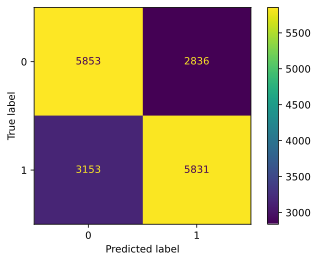

In [11]:
plot_confusion_matrix(diabetes_dt,X_test,y_test)

#### Test Data Scoring Results

The results we see here are very good across all metrics, showing that a model has been produced that is capable of predicting if a patient has diabetes when the input data has not been seen before by the model. However the scores shown need to be improved for this model to be effective.

##### Confusion Matrix

We can see that the model performs slightly better at predicting patients that do have diabetes however the false positive and false negative rates are very simillar.

##### Accuracy

With an accuracy score of 66% this model is quite effective without any hyper parameter tuning but there is room for improvement.

##### Precision

With a precision score of 67% has a relativly low false positive rate (predicting that people have diabetes when they do not).

##### Reacll

With a precision score of 65% has a relativly low false negative rate (predicting that people do not have diabetes when they did) Which is slightly worse than the false positive rate.

##### F1 Score

With a f1 score of 66% does have some room for improvement.

##### Conclusion

Overall the model with no tuning was able to peform better than 50% in all metrics which suggests that there exists a predictable pattern. In this state the model should not be used to predict if people have diabetes as its performace is not good enough for a real work medical application. It is likely to predict that someone does not have diabetes when in fact they do which would be dangerous and could negativly impact people. Comparing this to the scores from the training data would suggest that the model has been overfitted and is not good at predicting cases it has not seen before, suggesting that by altering the depth parameter it can be improved for classifying unseen examples.

Seeing how the model performace changes as the training data size changes
-------------------------------------------------------------------------

Here we will see how the accuracy of the model is affected when the training dataset size is changed.

In [12]:
train_sizes, train_scores, test_scores = learning_curve(diabetes_dt, X, y, cv=5)

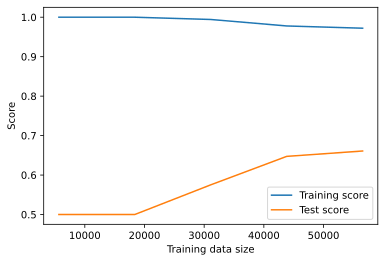

In [13]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test score')
plt.xlabel('Training data size')
plt.ylabel('Score')
plt.legend()
plt.show()

### Results

Here we can see that the training data accuracy of the model decreases as the training data size increases, likley as a result of the model not being able to account for all the data points as there is more data. The test data accuracy of the model increases. This is likely because the model is getting better and descibing the behaviour of the data more generally so it can perform well on unseen data. We can see the the accuracy of the train and test score is converging towards the same value. It is best to use more data as this means the model can perform better on data it has not seen before.

Hyperparameter Tuning
---------------------

Here we look at the 'max\_depth' hyperparameter which specifies the maximum number of levels the desision tree can have. Often a tree without this parameter tuned will overfit and have too great a depth meaning it is not as effective on unseen data. By setting a maximum we can make the model describe the data more generally.

### Finding the best max\_depth parameter to use

By testing multiple decision trees each with varying max\_depth hyperparameter values we can see which performs best (from 1-11). In this case we will be optimising for accuracy. A model is then built with the suggested hyper parameter.

In [14]:
param_range = range(1, 11)
train_scores, test_scores = validation_curve(diabetes_dt, X_train, y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy')

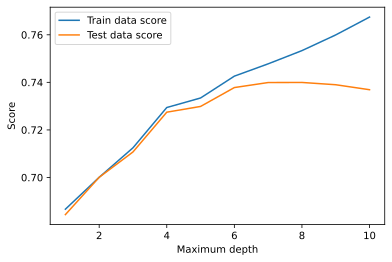

In [15]:
plt.plot(param_range, train_scores.mean(axis=1), label='Train data score')
plt.plot(param_range, test_scores.mean(axis=1), label='Test data score')
plt.legend(loc='best')
plt.xlabel('Maximum depth')
plt.ylabel('Score')
plt.show()

In [16]:
parameters = {'max_depth': param_range}
grid_search = GridSearchCV(estimator=diabetes_dt, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)
print("Best depth:", grid_search.best_params_['max_depth'])

Best depth: 8


In [17]:
diabetes_dt = tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=8)
diabetes_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

### Results of finding the best max depth value

From the graph we can see that 8 is the maximum depth where the accuracy when using the test data is best. This means this is the value that produces a decision tree that predicts most accurately on unseen data. This is also shown by running the cross validation grid search. A new desision tree is created using the max depth hyperparameter of 8.

#### Scoring the model with the training data

In [18]:
predicted = diabetes_dt.predict(X_train)
accuracy = accuracy_score(y_train, predicted)
precision = precision_score(y_train, predicted)
recall = recall_score(y_train, predicted)
f1 = f1_score(y_train, predicted)

print("Accuracy: {} \nPrecision: {} \nRecall: {} \nF1: {}".format(accuracy,precision,recall,f1))

Accuracy: 0.7523529300816688 
Precision: 0.7395018824210832 
Recall: 0.7749032698581291 
F1: 0.7567887970955433


#### Scoring the model with the training data - Results

Here we can see that the train data score is much lower than it was orignially suggesting that it was overfitted initially.

#### Scoring the model with the test data

In [19]:
predicted = diabetes_dt.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
f1 = f1_score(y_test, predicted)

print("Accuracy: {} \nPrecision: {} \nRecall: {} \nF1: {}".format(accuracy,precision,recall,f1))

Accuracy: 0.7395462004187178 
Precision: 0.7338528877975873 
Recall: 0.7651380231522708 
F1: 0.7491689826167511


#### Scoring the model with the test data - Results

Here we can see a significant improvement in the results across all metrics of the model. This shows that the tree was overfitted and can now predict unseen data better.

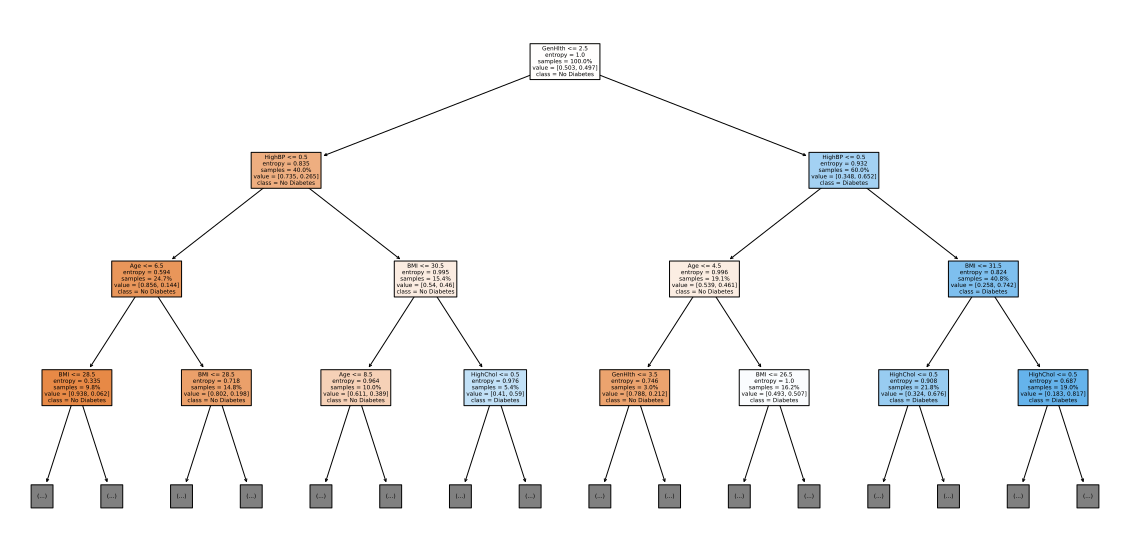

In [20]:
plt.figure(figsize=(20, 10))
feature_names = list(X.columns)
class_names = ['No Diabetes', 'Diabetes']
plot_tree(diabetes_dt, feature_names=feature_names, class_names=class_names, filled=True, max_depth=3, proportion=True)
plt.show()

Conclusion
----------

The model produced is capable of predicting if a patient has diabetes or not based on some biomarkers. ~74% of the predictions this model makes on unseen data will be accurate. The model performs equally well for predicting people that do have diabetes and those that do not. However this model should not be used in a real work medical application as its accuracy is not high enough and mistakes are very likely. The underlying desision tree can be inspected to understand some general relationships between the biomarkers used and how these impact the risk of diabetes. From looking at the first few nodes of the decision tree we can see that the GenHlth feature provided the greatest information gain when predicting diabetes.